# Faraday's Law Linear Fits

This notebook is used for analysis of the IOLab data for lab T2-E Induction, PHYSICS 5BL.

In [1]:
import numpy as np
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': '16'})

# Expt 1b: Series

## Data loading and interpolation

In [2]:
# check the data and headers
file = open('expt3-data-2.csv', 'r')
print(file.read())

Time (s),Bz (碌T),Voltage (mV)
0.009999999776482582,-50.28908157348633,-0.005442176945507526
0.019999999552965164,-50.30038833618164,-0.005494405049830675
0.029999999329447746,-50.283287048339844,-0.005531775299459696
0.03999999910593033,-50.25052261352539,-0.005494649522006512
0.05000000074505806,-50.313575744628906,-0.0055234371684491634
0.05999999865889549,-50.306697845458984,-0.005581384524703026
0.07000000029802322,-50.30219650268555,-0.005639471113681793
0.07999999821186066,-50.317928314208984,-0.005582166835665703
0.09000000357627869,-50.34086608886719,-0.005581719800829887
0.10000000149011612,-50.216976165771484,-0.005639303475618362
0.10999999940395355,-50.136512756347656,-0.005582334939390421
0.11999999731779099,-50.04064178466797,-0.005524247884750366
0.12999999523162842,-49.95198059082031,-0.005523577332496643
0.14000000059604645,-49.92002487182617,-0.005523576866835356
0.15000000596046448,-49.85807800292969,-0.005466273054480553
0.1599999964237213,-49.788265228271484,-0.005

In [3]:
# Load IOLab data--no interpolation needed here.
t, Bz, V = np.loadtxt('expt3-data.csv', delimiter=",", skiprows=1, usecols=(0,1,2), unpack=True)

In [4]:
dBz_raw = np.diff(Bz)
dt_raw = np.diff(t)
dBdt = dBz_raw / dt_raw
dBdt = np.append(dBdt, dBdt[-1])
dBdt = dBdt * 1e-6

V = V * 1e-3

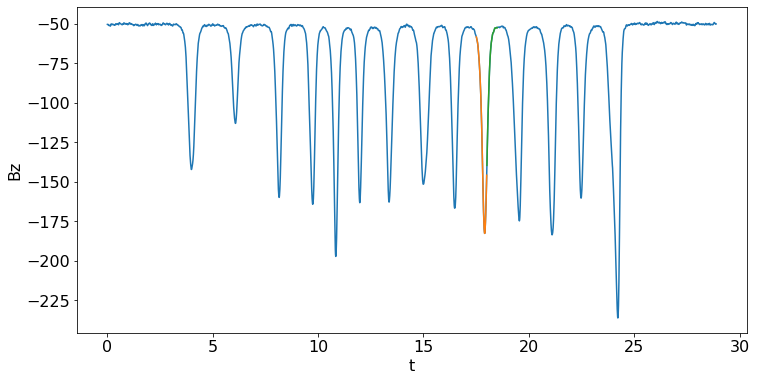

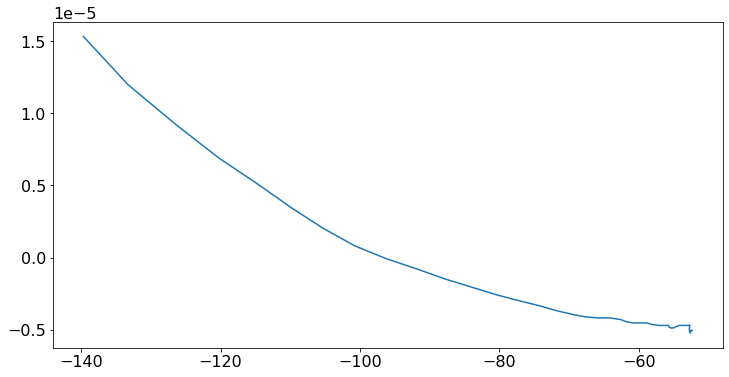

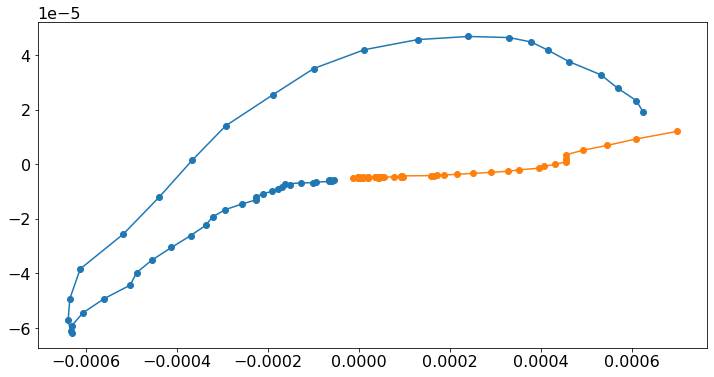

In [5]:
# lo, hi = 80, 817
# lo, hi = 1080, 1090


plt.figure(figsize=(12, 6))
# plt.plot(V[1:], y_raw)
plt.plot(t, Bz)
lo, hi = 1750, 1800
plt.plot(t[lo:hi], Bz[lo:hi])
lo, hi = 1800, 1850
plt.plot(t[lo:hi], Bz[lo:hi])
plt.xlabel('t')
plt.ylabel('Bz')
plt.title('')

plt.figure(figsize=(12, 6))
# plt.plot(Bz, V)
plt.plot(Bz[lo:hi], V[lo:hi])

plt.figure(figsize=(12, 6))
# plt.plot(V[lo:hi], dBdt[lo-1:hi-1])
lo, hi = 1750, 1800
plt.plot(dBdt[lo:hi], V[lo:hi])
plt.scatter(dBdt[lo:hi], V[lo:hi])

lo, hi = 1801, 1850
plt.plot(dBdt[lo:hi], V[lo:hi])
plt.scatter(dBdt[lo:hi], V[lo:hi])
# plt.plot(V[lo:hi], dBdt[lo+1:hi+1])

In [6]:
x_data, y_data = dBdt[1801:1850], V[1801:1850]
x_data

array([ 6.99033302e-04,  6.08159382e-04,  5.46163375e-04,  4.93344213e-04,
        4.54682077e-04,  4.54681622e-04,  4.54680854e-04,  4.30418414e-04,
        4.06913554e-04,  3.95169896e-04,  3.52677658e-04,  3.27241619e-04,
        2.90728176e-04,  2.51050897e-04,  2.16514948e-04,  1.87721512e-04,
        1.71308945e-04,  1.65132158e-04,  1.58789799e-04,  9.58847886e-05,
        9.32729247e-05,  9.63372002e-05,  9.24504956e-05,  7.78817387e-05,
        9.58851686e-05,  5.60091488e-05,  4.48086924e-05,  3.84143516e-05,
        9.27941957e-06,  2.09540520e-05,  4.24402019e-05,  4.51493366e-05,
        3.52206709e-05,  4.33030660e-05,  4.86068990e-05,  3.86241959e-05,
        2.02384105e-05, -2.96128189e-06,  0.00000000e+00, -2.38489315e-06,
        4.63284344e-06,  9.55140987e-06,  0.00000000e+00,  2.07119456e-05,
        4.70493879e-06, -1.81460926e-06, -1.75357667e-06, -1.23723044e-05,
        1.99252317e-05])

## Linear Fit
From the theory, we define the model $\epsilon=A\frac{dB}{dt}$ for a linear fit, where $A$ is the total area that the solenoid loop encloses

### Define the model:

In [7]:
def linear_model(dbdt, A, c):
    """Parameters are A, c;
    independent variable is dbdt.
    Returns the potential difference."""
    return A * dbdt + c

### Choose the model and initial fit parameter values then graph:


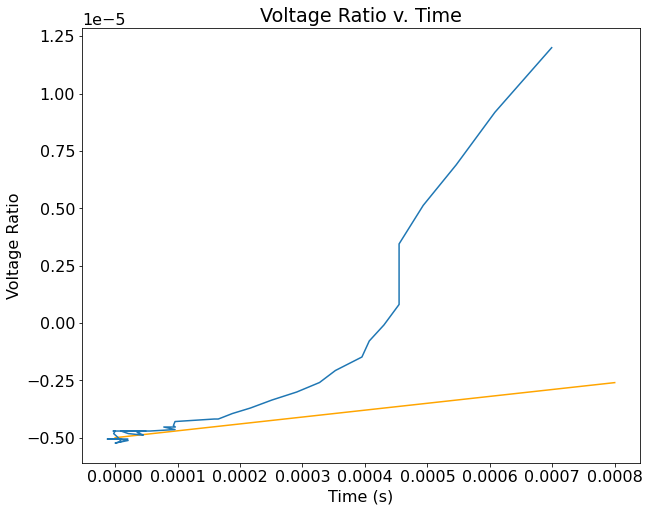

In [8]:
plt.figure(figsize=(10, 8))

# Initial guess values of fit parameters
Ainit, cinit = 0.003, -0.5*1e-5

# Graph
space = np.linspace(0, 8e-4, 100)
plt.plot(space, linear_model(space, Ainit, cinit), color='orange')
plt.plot(x_data, y_data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage Ratio')
plt.title('Voltage Ratio v. Time')
plt.show()

## Perform the fit then plot

In [9]:
# Perform the fit
start_pars = [Ainit, cinit]
pars, cov = opt.curve_fit(linear_model, x_data, y_data, p0=start_pars)

[A, c] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))

[[ 1.84808100e-02  1.20266978e-03]
 [-5.87395194e-06  3.04488700e-07]]


In [10]:
# Values predicted from fit
ypred = linear_model(space, A, c)

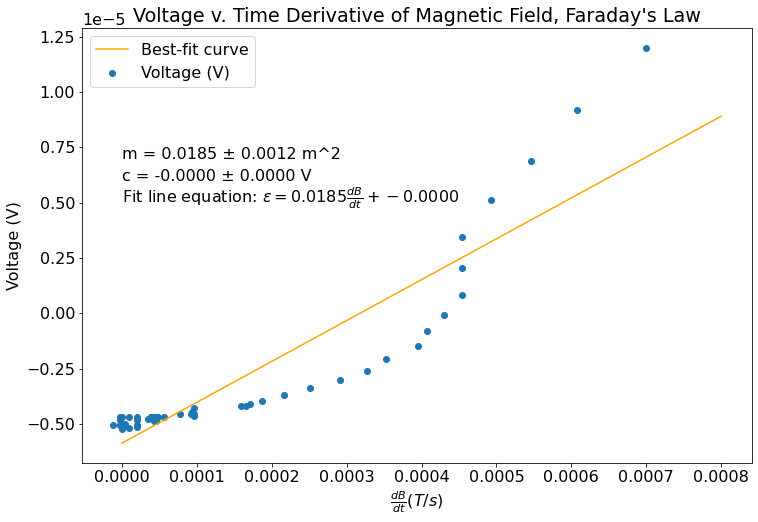

In [11]:
## Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(12, 8))

# Data and fit
plt.scatter(x_data, y_data, label='Voltage (V)')
plt.plot(space, ypred, color='orange', label='Best-fit curve')

# Axes label and title
plt.legend()
plt.xlabel('$\\frac{dB}{dt} (T/s)$')
plt.ylabel('Voltage (V)')
plt.title("Voltage v. Time Derivative of Magnetic Field, Faraday's Law")



# Text
plt.text(0, 0.7e-5, "m = %5.4f \u00b1 %5.4f m^2" % (pars[0], std_errs[0]))
plt.text(0, 0.6e-5, "c = %5.4f \u00b1 %5.4f V" % (pars[1], std_errs[1]))
plt.text(0, 0.5e-5, "Fit line equation: $\\varepsilon=%5.4f\\frac{dB}{dt}+%5.4f}$" %
         (pars[0], pars[1]))

plt.savefig('fig-3.png')